Import Library

In [ ]:
!pip install keras -tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.7/240.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 34.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 require

In [ ]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.8 MB/s eta 0:00:00


In [ ]:
import cv2
import datetime
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_hub as hub

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras import Model, Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#utility & processing
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

#callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#keras tuner
import keras_tuner
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

#warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install tensorflow-addons
import tensorflow_addons as tfa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.7 MB/s eta 0:00:00


Download dan Unzip Dataset

In [ ]:
# https://drive.google.com/file/d/150855rVh-srkGhdywBsPK4_mHSZCwRWg/view?usp=sharing
!gdown 1uBWS1y-K031wvMrVryTQ0-GE1bva89mQ

Downloading...
From (original): https://drive.google.com/uc?id=1uBWS1y-K031wvMrVryTQ0-GE1bva89mQ
From (redirected): https://drive.google.com/uc?id=1uBWS1y-K031wvMrVryTQ0-GE1bva89mQ&confirm=t&uuid=84ddd119-d0af-43f6-866a-d10f84e0937e
To: /content/mendeley.zip
100% 2.21G/2.21G [00:39<00:00, 56.6MB/s]


In [ ]:
#unzip dataset
%%capture
!unzip mendeley.zip;

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for dirname, _, filenames in os.walk('/content/mendeley'):
    print(dirname)

/content/mendeley
/content/mendeley/Negative for Intraepithelial malignancy
/content/mendeley/Low squamous intra-epithelial lesion
/content/mendeley/Squamous cell carcinoma
/content/mendeley/High squamous intra-epithelial lesion


In [ ]:
filenames = tf.io.gfile.glob('/content/mendeley/*/*')
print(len(filenames))
filenames[:3]

963


['/content/mendeley/Low squamous intra-epithelial lesion/LSIL_4 (26).jpg',
 '/content/mendeley/Low squamous intra-epithelial lesion/LSIL_3 (12).jpg',
 '/content/mendeley/Low squamous intra-epithelial lesion/LSIL_4 (15).jpg']

In [ ]:
data = pd.DataFrame()
for el in range(0, len(filenames)):
    target = filenames[el].split('/')[-2]
    path = filenames[el]

    data.loc[el, 'filename'] = path
    data.loc[el, 'class'] = target

print(data['class'].value_counts(dropna=False))
data

class
Negative for Intraepithelial malignancy    613
High squamous intra-epithelial lesion      163
Low squamous intra-epithelial lesion       113
Squamous cell carcinoma                     74
Name: count, dtype: int64


,filename,class
0,/content/mendeley/Low squamous intra-epithelia...,Low squamous intra-epithelial lesion
1,/content/mendeley/Low squamous intra-epithelia...,Low squamous intra-epithelial lesion
2,/content/mendeley/Low squamous intra-epithelia...,Low squamous intra-epithelial lesion
3,/content/mendeley/Low squamous intra-epithelia...,Low squamous intra-epithelial lesion
4,/content/mendeley/Low squamous intra-epithelia...,Low squamous intra-epithelial lesion
...,...,...
958,/content/mendeley/Negative for Intraepithelial...,Negative for Intraepithelial malignancy
959,/content/mendeley/Negative for Intraepithelial...,Negative for Intraepithelial malignancy
960,/content/mendeley/Negative for Intraepithelial...,Negative for Intraepithelial malignancy
961,/content/mendeley/Negative for Intraepithelial...,Negative for Intraepithelial malignancy


Mengacak Data

In [ ]:
data = shuffle(data, random_state=42)
data.reset_index(drop=True, inplace=True)
data

,filename,class
0,/content/mendeley/Negative for Intraepithelial...,Negative for Intraepithelial malignancy
1,/content/mendeley/High squamous intra-epitheli...,High squamous intra-epithelial lesion
2,/content/mendeley/Negative for Intraepithelial...,Negative for Intraepithelial malignancy
3,/content/mendeley/Negative for Intraepithelial...,Negative for Intraepithelial malignancy
4,/content/mendeley/High squamous intra-epitheli...,High squamous intra-epithelial lesion
...,...,...
958,/content/mendeley/Low squamous intra-epithelia...,Low squamous intra-epithelial lesion
959,/content/mendeley/High squamous intra-epitheli...,High squamous intra-epithelial lesion
960,/content/mendeley/Negative for Intraepithelial...,Negative for Intraepithelial malignancy
961,/content/mendeley/Negative for Intraepithelial...,Negative for Intraepithelial malignancy


In [ ]:
change = {
'Negative for Intraepithelial malignancy' : '0',
'High squamous intra-epithelial lesion': '1',
'Low squamous intra-epithelial lesion' : '2',
'Squamous cell carcinoma' : '3',
}

data['class'] = data['class'].map(change)
data

,filename,class
0,/content/mendeley/Negative for Intraepithelial...,0
1,/content/mendeley/High squamous intra-epitheli...,1
2,/content/mendeley/Negative for Intraepithelial...,0
3,/content/mendeley/Negative for Intraepithelial...,0
4,/content/mendeley/High squamous intra-epitheli...,1
...,...,...
958,/content/mendeley/Low squamous intra-epithelia...,2
959,/content/mendeley/High squamous intra-epitheli...,1
960,/content/mendeley/Negative for Intraepithelial...,0
961,/content/mendeley/Negative for Intraepithelial...,0


In [ ]:
indexes=[]

def func(x):
    if x[-4:] != '.jpg':
        idx = data[data['filename'] == x].index
        indexes.append(idx[0])
        print(idx[0], x)
    return x

data['filename'].map(func)

print(data.shape)
data.drop(index=indexes, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.shape)

790 /content/mendeley/Negative for Intraepithelial malignancy/Results.csv
(963, 2)
(962, 2)


In [ ]:
for el in range(100, 120):
    path = data.loc[el, 'filename']
    img  = cv2.imread(path)
    print(img.shape)

(1536, 2048, 3)
(1536, 2048, 3)
(1536, 2048, 3)
(1536, 2048, 3)
(1536, 2048, 3)
(1536, 2048, 3)
(1536, 2048, 3)
(1536, 2048, 3)
(1536, 2048, 3)
(1536, 2048, 3)
(1536, 2048, 3)
(1536, 2048, 3)
(1536, 2048, 3)
(1536, 2048, 3)
(1536, 2048, 3)
(1536, 2048, 3)
(1536, 2048, 3)
(1536, 2048, 3)
(1536, 2048, 3)
(1536, 2048, 3)


Membagi Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Menghapus baris dengan nilai NaN pada kolom 'class'
data_cleaned = data.dropna(subset=['class'])

# Melakukan split data menjadi train dan test set
train_data, test_data = train_test_split(data_cleaned, test_size=0.2, random_state=42, stratify=data_cleaned['class'])

print(train_data['class'].value_counts(dropna=False))
print(test_data['class'].value_counts(dropna=False))


class
0    489
1    130
2     91
3     59
Name: count, dtype: int64
class
0    123
1     33
2     22
3     15
Name: count, dtype: int64


Augmentasi Data

In [ ]:
BATCH_SIZE = 32
EPOCHS = 50
IM_HEIGHT = 224
IM_WIDTH = 224

AUTOTUNE = tf.data.experimental.AUTOTUNE

tf.random.set_seed(999)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
                  train_data,
                  x_col="filename",
                  y_col="class",
                  target_size=(IM_HEIGHT, IM_WIDTH),
                  class_mode='categorical',
                  batch_size= BATCH_SIZE,
                  color_mode='rgb',
                  shuffle=True,
                  num_parallel_calls=AUTOTUNE)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
                 test_data,
                 x_col="filename",
                 y_col="class",
                 target_size=(IM_HEIGHT, IM_WIDTH),
                 class_mode='categorical',
                 batch_size= BATCH_SIZE,
                 color_mode='rgb',
                 shuffle=False,
                 num_parallel_calls=AUTOTUNE)

Found 769 validated image filenames belonging to 4 classes.
Found 193 validated image filenames belonging to 4 classes.


Arsitektur Model

In [ ]:
# Menggunakan URL model EfficientNetV2 dari TensorFlow Hub
efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/feature_vector/2"

# Membuat model menggunakan EfficientNetV2 dari TensorFlow Hub
trf_lr_efficientnet_model = tf.keras.Sequential([
    hub.KerasLayer(efficientnet_url, trainable=False),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
trf_lr_efficientnet_model.build([None, IM_HEIGHT, IM_WIDTH, 3])

# Mengompilasi model

trf_lr_efficientnet_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics='accuracy'
)
trf_lr_efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              53150388  
                                                                 
 dense_2 (Dense)             (None, 512)               655872    
                                                                 
 dense_3 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 53808312 (205.26 MB)
Trainable params: 657924 (2.51 MB)
Non-trainable params: 53150388 (202.75 MB)
_________________________________________________________________


In [ ]:
init_time = datetime.datetime.now()


train_steps = train_generator.samples // BATCH_SIZE
valid_steps = test_generator.samples // BATCH_SIZE

early_stopping = EarlyStopping(monitor="val_loss", patience=8, mode="min")
checkpoint = ModelCheckpoint("loss-{val_loss:.4f}.h5", monitor="val_loss", verbose=0,
                             save_best_only=True, save_weights_only=True, mode="min")
learning_rate_reduction = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=4,
                                            min_lr=1e-7, verbose=1, mode="min")
history = trf_lr_efficientnet_model.fit(
    train_generator,
    validation_data=test_generator,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    steps_per_epoch=train_steps,
    validation_steps=valid_steps,
    callbacks=[
                checkpoint,
                early_stopping,
                learning_rate_reduction],
    verbose=1,
    )
requared_time = datetime.datetime.now() - init_time
print(f'\nRequired time:  {str(requared_time)}\n')

Epoch 1/50
24/24 [==============================] - 90s 3s/step - loss: 0.5600 - accuracy: 0.7843 - val_loss: 0.5201 - val_accuracy: 0.7865 - lr: 0.0010
Epoch 2/50
24/24 [==============================] - 69s 3s/step - loss: 0.2337 - accuracy: 0.9159 - val_loss: 0.3989 - val_accuracy: 0.8385 - lr: 0.0010
Epoch 3/50
24/24 [==============================] - 64s 3s/step - loss: 0.1727 - accuracy: 0.9335 - val_loss: 0.3096 - val_accuracy: 0.8906 - lr: 0.0010
Epoch 4/50
24/24 [==============================] - 63s 3s/step - loss: 0.1609 - accuracy: 0.9389 - val_loss: 0.3038 - val_accuracy: 0.8906 - lr: 0.0010
Epoch 5/50
24/24 [==============================] - 60s 2s/step - loss: 0.1376 - accuracy: 0.9417 - val_loss: 0.2227 - val_accuracy: 0.9323 - lr: 0.0010
Epoch 6/50
24/24 [==============================] - 58s 2s/step - loss: 0.1140 - accuracy: 0.9579 - val_loss: 0.2825 - val_accuracy: 0.9219 - lr: 0.0010
Epoch 7/50
24/24 [==============================] - 60s 3s/step - loss: 0.1078 - a

In [ ]:
def plot_performance(model_name, accuracy, val_accuracy, loss, val_loss):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('{} : Loss'.format(model_name), fontsize=12, fontweight='bold')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper right')

  plt.subplot(1,2,2)
  plt.plot(accuracy)
  plt.plot(val_accuracy)
  plt.title('{} : Accuracy'.format(model_name), fontsize=12, fontweight='bold')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper right')

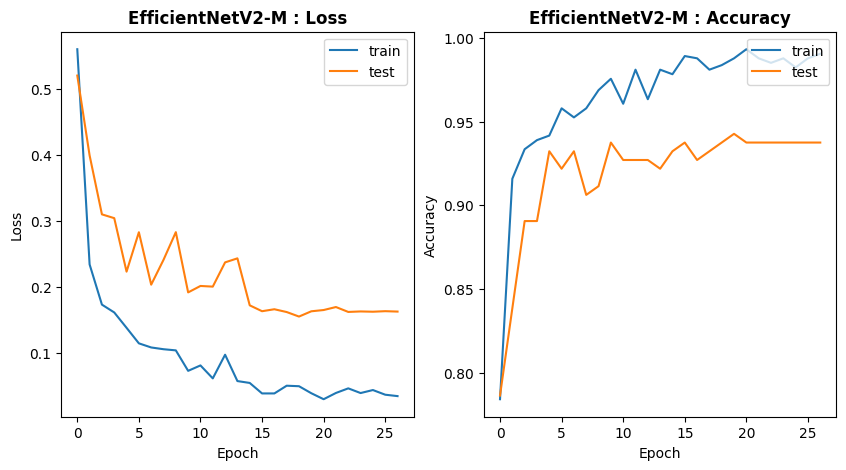

In [ ]:
plot_performance(model_name='EfficientNetV2-M',
                  accuracy=history.history['accuracy'],
                 val_accuracy=history.history['val_accuracy'],
                 loss=history.history['loss'],
                 val_loss=history.history['val_loss'])

In [ ]:
test_steps = test_generator.samples // BATCH_SIZE

test_loss, test_acc = trf_lr_efficientnet_model.evaluate(test_generator, steps=test_steps)
print('\naccuracy:', test_acc, 'loss: ',test_loss)

6/6 [==============================] - 11s 2s/step - loss: 0.1622 - accuracy: 0.9375

accuracy: 0.9375 loss:  0.16219185292720795


In [ ]:
predict = trf_lr_efficientnet_model.predict(test_generator, steps=test_steps)
y_hat = np.argmax(predict, axis=1)
y_hat[:20]

6/6 [==============================] - 23s 3s/step


array([1, 2, 0, 0, 2, 2, 0, 0, 2, 3, 0, 2, 2, 0, 0, 1, 0, 2, 1, 0])

In [ ]:
test_labels_df = pd.DataFrame()
test_labels_df[['class']] = test_data[['class']]

change = {
'0' : 0,
'1' : 1,
'2' : 2,
'3' : 3,
'4' : 4
}

test_labels_df['class'] = test_labels_df['class'].map(change)
test_labels_df = test_labels_df[ : test_steps*BATCH_SIZE]


y_test = np.array(test_labels_df['class'])
y_test[:20]

array([3, 3, 0, 0, 2, 1, 0, 1, 2, 3, 0, 2, 2, 0, 0, 1, 0, 3, 1, 0])

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       123
           1       0.92      0.75      0.83        32
           2       0.81      0.95      0.88        22
           3       1.00      0.80      0.89        15

    accuracy                           0.94       192
   macro avg       0.92      0.88      0.89       192
weighted avg       0.94      0.94      0.94       192
 



<Axes: >

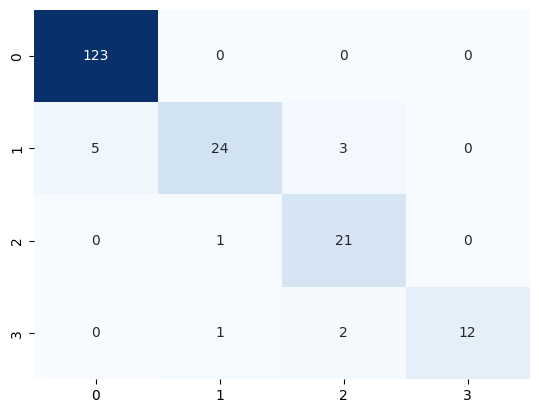

In [ ]:
print(classification_report(y_test, y_hat), '\n')
cm = confusion_matrix(y_test, y_hat)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='.0f', cbar=False)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
                  train_data,
                  x_col="filename",
                  y_col="class",
                  target_size=(IM_HEIGHT, IM_WIDTH),
                  class_mode='categorical',
                  # batch_size= BATCH_SIZE,
                  color_mode='rgb',
                  shuffle=False,
                  num_parallel_calls=AUTOTUNE)

Found 769 validated image filenames belonging to 4 classes.


In [ ]:
train_steps = train_generator.samples // BATCH_SIZE

y_train_pred_proba = trf_lr_efficientnet_model.predict(train_generator)
y_train_pred = np.argmax(y_train_pred_proba, axis=1)
y_train_true = train_generator.classes

25/25 [==============================] - 54s 2s/step


In [ ]:
train_report = classification_report(y_train_true, y_train_pred)
print("Classification Report for Training Data:")
print(train_report)

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       489
           1       0.98      0.95      0.96       130
           2       1.00      1.00      1.00        91
           3       0.97      0.95      0.96        59

    accuracy                           0.99       769
   macro avg       0.98      0.98      0.98       769
weighted avg       0.99      0.99      0.99       769

